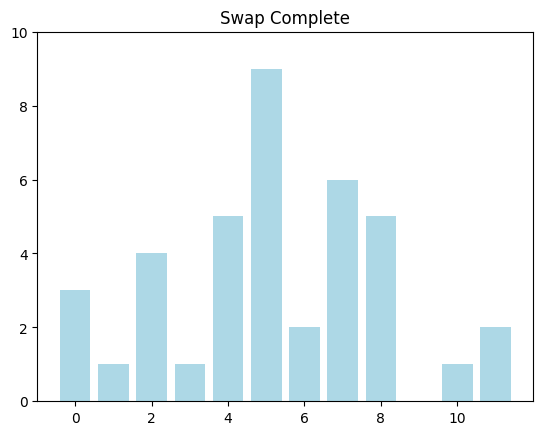

In [21]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

# -------------------------------------
# 1. State Generator: Bubble Sort
# -------------------------------------
def bubble_sort_generator(array):
    """
    Bubble sort generator that yields state snapshots.

    Yields:
      - A copy of the array's current state.
      - A tuple (i, j) indicating active indices to highlight.
        Use (None, None) when no indices are active.

    Workflow for each swap:
      a) Yield pre-swap: highlight the elements to be swapped.
      b) Execute the swap.
      c) Yield post-swap state: with no active highlights.
    """
    a = array.copy()

    # Yield the initial state.
    yield a.copy(), (None, None)

    n = len(a)
    for i in range(n):
        for j in range(0, n - i - 1):
            if a[j] > a[j + 1]:
                # Pre-swap frame: highlight the pair that will swap.
                yield a.copy(), (j, j + 1)
                # Swap operation.
                a[j], a[j + 1] = a[j + 1], a[j]
                # Post-swap frame: show the updated array (no highlights).
                yield a.copy(), (None, None)
    # Final state is sorted.
    yield a.copy(), (None, None)

# ----------------------------------
# 2. Visualization Update Function
# ----------------------------------
def update(frame):
    """
    Update function for the animation.

    Parameters:
      frame: A tuple containing:
             - `arr`: The current order of the array.
             - `(active_i, active_j)`: Indices to highlight.
    """
    arr, (active_i, active_j) = frame

    # Clear the axes to redraw fresh.
    ax.clear()
    ax.set_ylim(0, max(data) + 1)

    # Set default color for all bars.
    colors = ["lightblue"] * len(arr)

    # Decide the title and modify colors if active indices are provided.
    if active_i is not None and active_j is not None:
        colors[active_i] = "red"
        colors[active_j] = "red"
        title = f"Swapping indexes {active_i} and {active_j}"
    else:
        if arr == sorted(data):
            title = "Sorted!"
        else:
            title = "Swap Complete"

    ax.set_title(title)
    # Draw bars (positions correspond to current order in arr).
    ax.bar(range(len(arr)), arr, color=colors)

    # Optional: return the list of artists (bars) that were drawn.
    return ax.patches

# --------------------------
# 3. Animation Engine Setup
# --------------------------

# Data to be sorted and visualized.
data = [3, 1, 4, 1, 5, 9, 2, 6, 5, 0, 1, 2]

# Create a figure and axes for the bar chart.
fig, ax = plt.subplots()
ax.set_ylim(0, max(data) + 1)

# Generate all the state snapshots using the state generator.
steps = list(bubble_sort_generator(data))

# Set up the FuncAnimation: it will iterate over the states.
anim = FuncAnimation(fig, update, frames=steps, interval=700, repeat=False)

#Display the animation inline (works in Jupyter Notebook)
display(HTML(anim.to_jshtml()))

Template

```
# State Generator
def algorithm_visualization(data):
    # Setup any initial state
    state = init_state(data)
    yield state, None, None  # Intro frame

    # Main loop of your algorithm
    while not completed(state):
        # Determine active elements/cells/indices
        active_info = get_active_info(state)
        yield state.copy(), *active_info  # Pre-operation frame

        # Update the state
        state = update_state(state)
        yield state.copy(), None, None  # Post-operation frame

    # Final state
    yield state.copy(), None, None

# Visualization Update Function
def update_visual(frame):
    state, active1, active2 = frame
    ax.clear()
    # Draw the updated state of your data structure
    draw_data_structure(state, active_info=(active1, active2))
    return artists  # Return the artists being drawn, if needed

# Animation Engine Setup
steps = list(algorithm_visualization(data))
anim = FuncAnimation(fig, update_visual, frames=steps, interval=700, repeat=False)

```